# **Bank Customer Churn Prediction**

### **Problem Statement**

A major retail bank wants to reduce customer attrition by identifying which customers are likely to leave (churn) in the near future. Early detection will allow the bank to target retention strategies more effectively and avoid revenue loss.

---

### **Stakeholder Expectations**

- Identify key factors that influence churn.

- Build a machine learning model to predict customer churn.

- Provide clear visual insights and actionable recommendations.

- Interpret model results in layman's terms with actionable strategies.

---

### **Dataset Overview**

In banking, customer churn (or attrition) refers to the loss of customers who close their accounts, switch to another bank, or cease using a bank's services. It essentially measures the rate at which customers leave a bank over a specific period.

The dataset consists of **10,000 customer records** from a bank, each with **14 attributes**, such as:

- Demographics: Geography, Gender, Age

- Account info: Credit Score, Balance, Tenure, Products, Credit Card, Salary

- Target Variable: Exited (1 = churned, 0 = retained)

Link - https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv

---

### **1.Importing Libraries and Dataset**











In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

This block loads essential libraries for data processing (pandas, numpy) and visualization (matplotlib, seaborn), enabling both numerical analysis and visual storytelling.

## **2.Load Dataset**

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The first few rows show that the dataset contains unique customer identifiers, demographic and financial variables, and a churn indicator.



### **3.Basic Info on Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Total records: **10,000**

- No missing values.

- Data types are appropriate: numeric for scores, balance, salary; object for categorical fields.

This confirms the data is clean and ready for analysis.

## **4.Missing Value Check**

In [4]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


This step ensures data completeness. The result shows 0 missing values, confirming the dataset is clean and requires no imputation at this stage.

**No preprocessing required for null handling.**

## **5.Dataset Dimensions**

In [5]:
df.shape

(10000, 14)

This outputs:

- **10,000 rows (customers)**

- ***14 columns ***

## **6.Feature Engineering – Dropping Redundant Columns**

In [6]:
#Feature Engineering+EDA
df.drop("Surname",axis=1,inplace=True)
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The **Surname** column is dropped as it holds no predictive value—it's merely a personal identifier and adds noise to modeling. Removing such columns improves model generalization.

## **7. Geography-wise Churn Patterns**

In [7]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

The dataset contains customers from three countries: **France, Spain, and Germany.**



## **8. Grouped Churn Count by Geography**

In [8]:
geog_cts=df.groupby(["Geography","Exited"]).size().reset_index().rename(columns={0:"Churn Count"})
geog_cts

,Geography,Exited,Churn Count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


This creates a summary table showing how many customers **churned or stayed** in each country.



## **9.  Visualizing Churn by Geography**


(0.0, 5000.0)

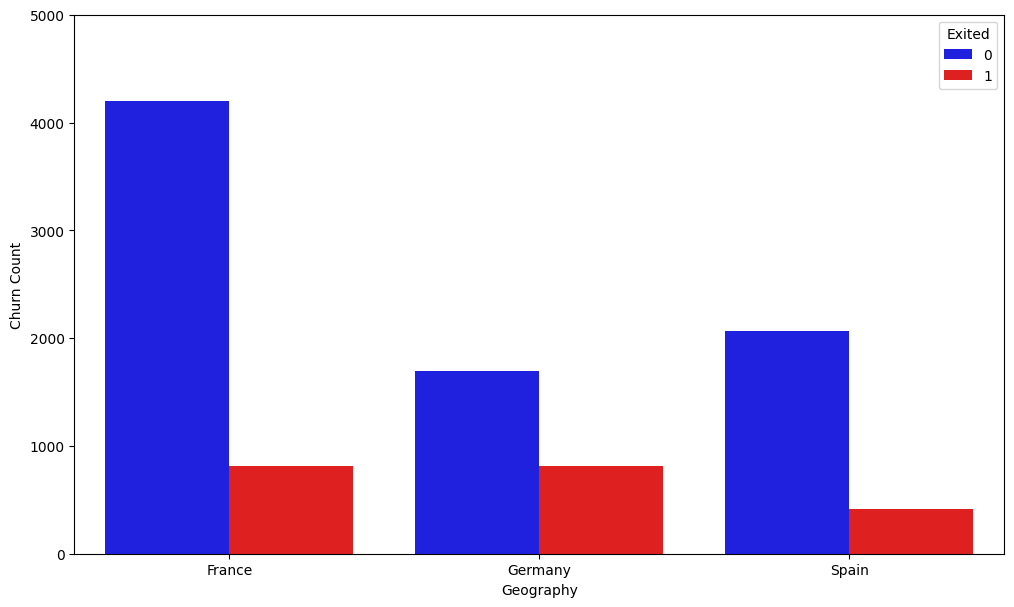

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,7) #controls figuresize (x,y)as the size coordinates
sns.barplot(x="Geography",y="Churn Count",hue="Exited",data=geog_cts,palette=['blue','red'])
plt.xlabel("Geography")
plt.ylabel("Churn Count")
plt.ylim(0,5000)


### **Visual Analysis:**
- **France** has the **highest customer base**, and the majority **did not churn**.

- **Germany**, despite a **smaller customer base**, has a **higher churn rate **(~40–45%).

- **Spain** has **moderate churn**.


### **Insight for Stakeholders:**
- Focus on **Germany** for churn reduction campaigns.

- **Spain** can benefit from **preventive targeting**.

- **France’s** retention strategy seems **effective**.

In [10]:
# France has the highest non exited count, the second highest being Spain.


## **10.Gender-wise Churn Breakdown**

In [11]:
gend_cts=df.groupby(["Gender","Exited"]).size().reset_index().rename(columns={0:"Churn Count"})
gend_cts

,Gender,Exited,Churn Count
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


(0.0, 5000.0)

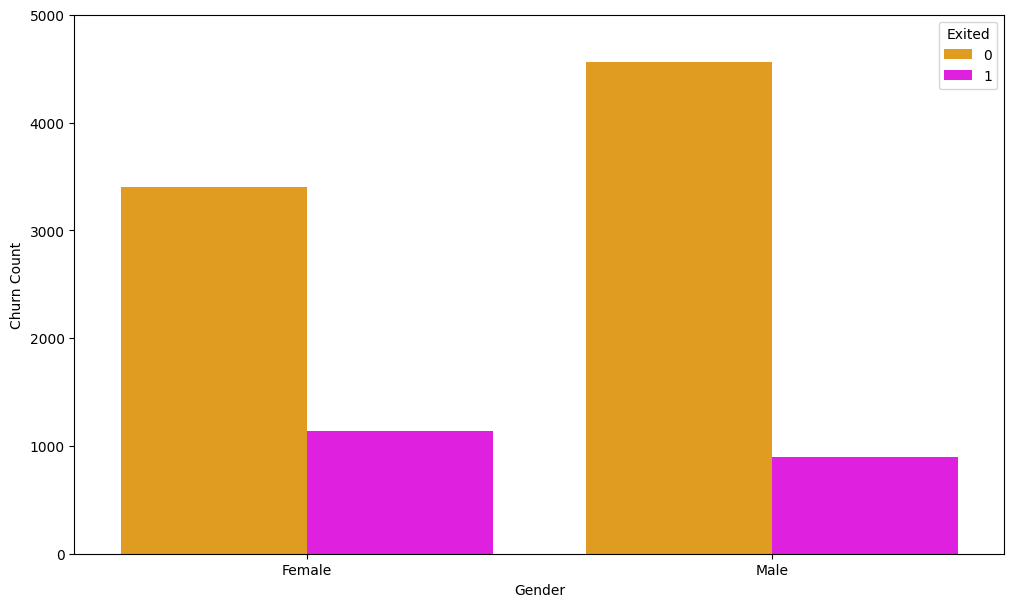

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,7) #controls figuresize (x,y)as the size coordinates
sns.barplot(x="Gender",y="Churn Count",hue="Exited",data=gend_cts,palette=['orange','magenta'])
plt.xlabel("Gender")
plt.ylabel("Churn Count")
plt.ylim(0,5000)


### **Visual Analysis:**

- Both **male and female customers churn**, but churn is **slightly higher among females.**

- The majority in both groups stayed, but the **churn percentage in females is ~27% vs 20–22% in males**.

### **Stakeholder Insight:**

A targeted retention campaign focusing on **female customers**—especially in **Germany**—might **reduce churn further**.

## **12. Churn Analysis by Gender and Active Membership**

In [13]:
gend_act=df.groupby(["Gender","IsActiveMember"]).size().reset_index().rename(columns={0:"Active Count"})
gend_act

,Gender,IsActiveMember,Active Count
0,Female,0,2259
1,Female,1,2284
2,Male,0,2590
3,Male,1,2867


(0.0, 5000.0)

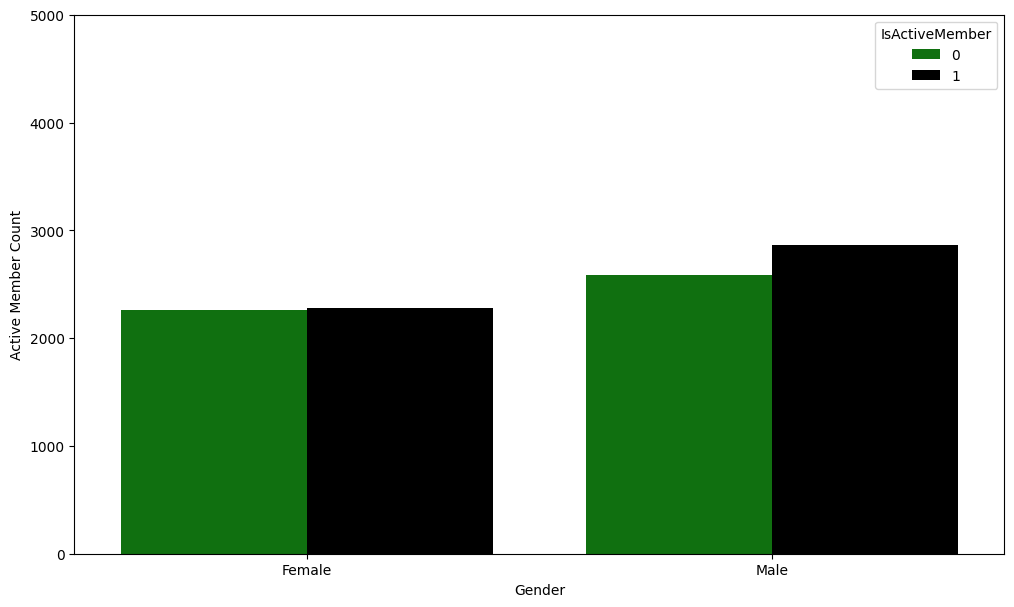

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,7) #controls figuresize (x,y)as the size coordinates
sns.barplot(x="Gender",y="Active Count",hue="IsActiveMember",data=gend_act,palette=['green','black'])
plt.xlabel("Gender")
plt.ylabel("Active Member Count")
plt.ylim(0,5000)


### **Visual Analysis:**

- **Higher** number of **inactive female members** (2284) compared to inactive male members (2867), while **active female members** (2259) are **slightly fewer** than active **male members** (2500).

-  The **active member count is relatively balanced between genders**, with **males** showing a **slightly higher total count**.


### **Stakeholder Insight:**

A **targeted engagement strategy** focusing on **increasing activity among female members** could help **balance the gender distribution** and potentially **reduce inactivity rates**.

## **13.Churn Analysis by Exited Status**

In [15]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


([<matplotlib.patches.Wedge at 0x7d05d0b025d0>,
 [Text(-0.8823432229396718, 0.656864093197697, 'Not Exited'),
  Text(0.8823431237559431, -0.6568642264278096, 'Exited')],
 [Text(-0.4812781216034573, 0.358289505380562, '79.63%'),
  Text(0.48127806750324165, -0.35828957805153244, '20.37%')])

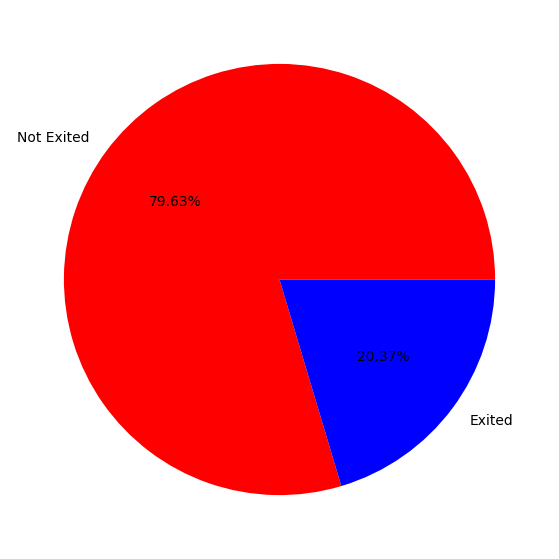

In [16]:
y1=[7963,2037]
labels=["Not Exited","Exited"]
plt.pie(y1,labels=labels,autopct='%1.2f%%',colors=["red","blue"])

### **Visual Analysis:**

- The **majority of customers** (79.63%) have **not exited** to churn, while 20.37% were **exited**, indicating a **significant retention rate**.

- Notable difference spotted, with the **"Not Exited" to churn **category being approximately **3.9 times larger** than the **"Exited" to churn category**.

### **Stakeholder Insight:**

A **retention strategy** focusing **on the 20.37% of customers** who have **exited to churn** could help **improve overall retention**, potentially **increasing the "Not Exited" to churn percentage** by addressing key churn factors.

In [17]:
#This is a moderately imbalanced dataset

## **14.Age Distribution of Customers**

Text(0.5, 1.0, 'Customer Age Distribution')

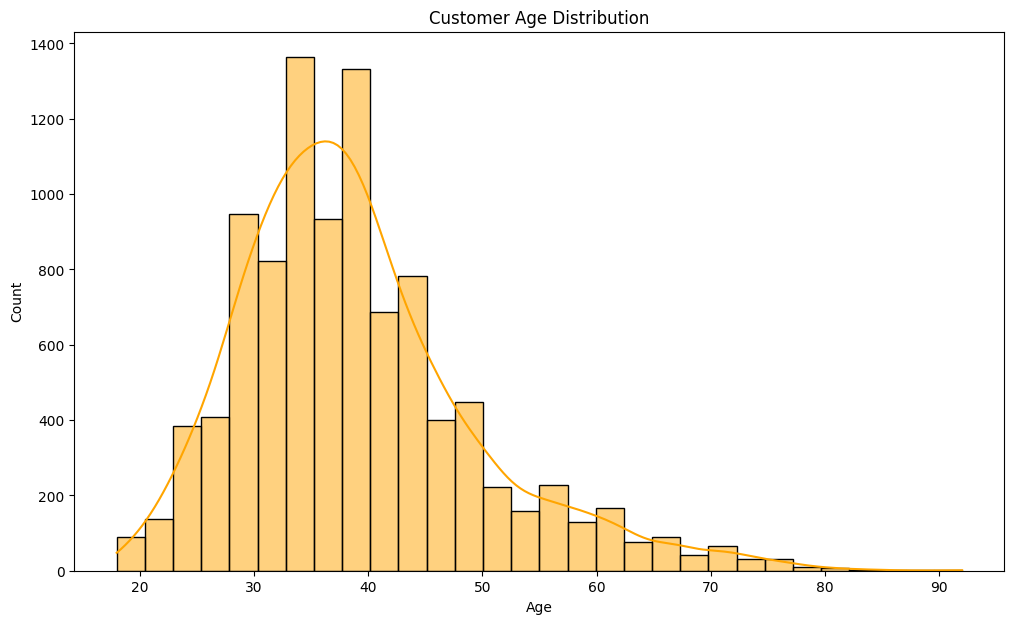

In [18]:
sns.histplot(df['Age'], kde=True, bins=30, color='orange')
plt.title("Customer Age Distribution")

### **Visual Analysis:**

- Most customers are aged between **30 and 40**.

- A small but notable peak exists around **40–50**, which may correlate with **higher churn risk**.

## **15.Age vs Churn Relationship**

Text(0.5, 1.0, 'Age vs Churn')

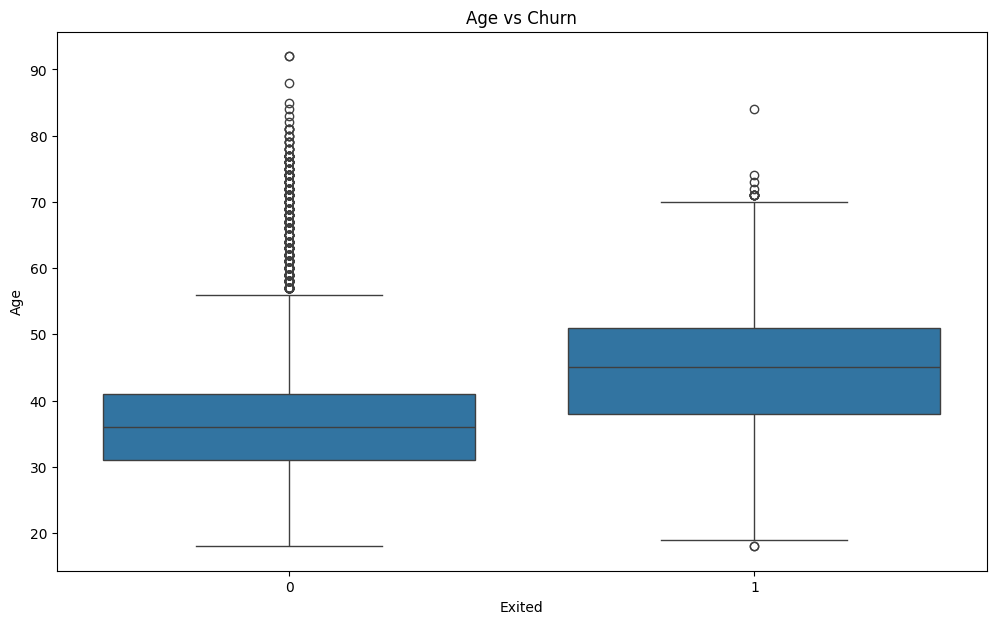

In [19]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")

### **Interpretation:**

- **Exited customers are generally older** than retained ones.

- Median age for churned customers is **~45**, whereas for retained it’s closer to **~35–38**.

### **Stakeholder Insight:**

Introduce **age-specific offers** or concierge support for **customers above 45**.



## **16.Balance Distribution Among Churned vs Retained**

Text(0.5, 1.0, 'Balance Distribution vs Churn')

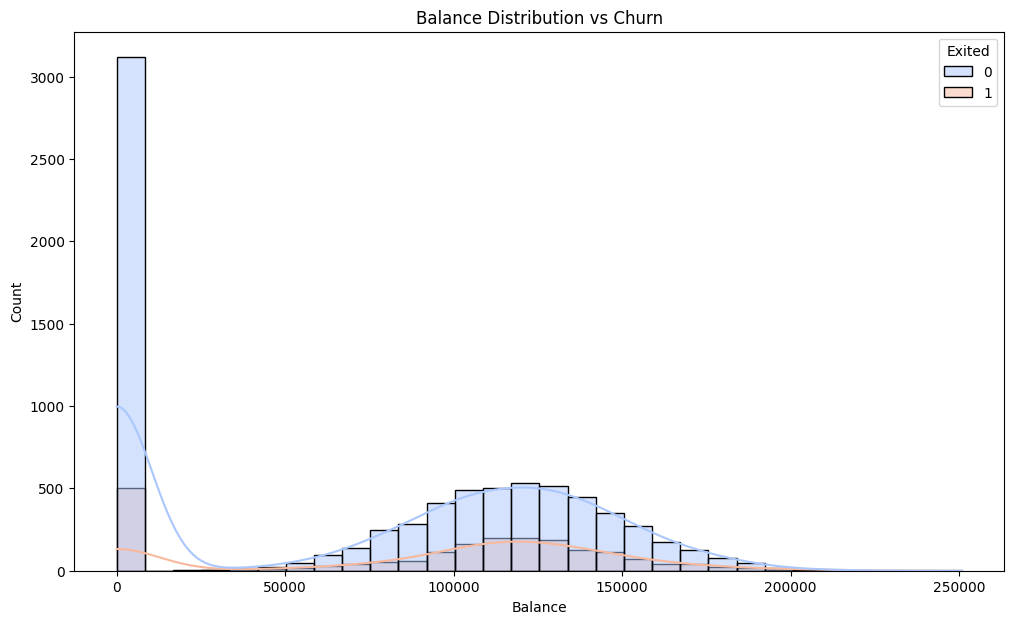

In [20]:
sns.histplot(data=df, x='Balance', hue='Exited', bins=30, palette='coolwarm', kde=True)
plt.title("Balance Distribution vs Churn")


### **Insight:**

- Customers with **zero balance rarely churn.**

- Those with **higher balances (>100,000)** show **higher churn rates**.

### **Business Strategy:**

High-value clients are leaving—consider **premium support tiers**, loyalty rewards, or personal banking services.



## **17.Encoding the Gender column (Categorical Variable)**

In [21]:
df["Gender"]=df["Gender"].map({"Female":1,"Male":0})
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


## **18.Encoding the Geography column (Categorical Variable)**

In [22]:
df["Geography"]=df["Geography"].map({"France":1,"Germany":2,"Spain":3})
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,3,1,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Now the dataset is completely cleaned

## **19.Correlation Heatmap**

<Axes: >

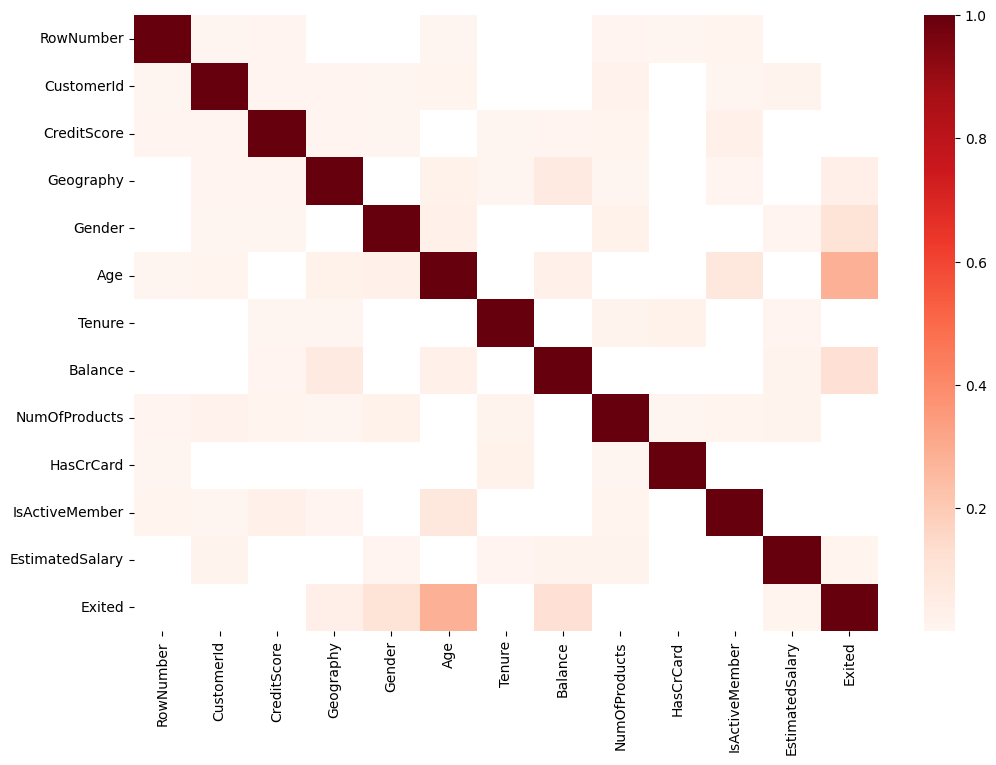

In [24]:
corr = df.corr()
kot = corr[corr>=.0]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

### **Observations:**

- **Age and Balance** show **mild positive correlation** with churn.

- **IsActiveMember and NumOfProducts** have **negative correlation with churn**.

- **CreditScore** has little to **bold text**no correlation.

### **Conclusion:**

Retention strategies should consider **engagement metrics** over credit scores.



In [25]:
#All X variables are non-correlated (strong correlations) and hence totally independant of each other.
#A corr of roughly 0.3 was observed between Age and Exited which indicates Age was the most important feature to be considered.
#Gender had an even softer (~0.2) correlation with Exited along with Balance.
#Geography had the softest correlation around

In [26]:
X=df.iloc[:,:-1].values
Y=df["Exited"]
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [27]:
#UnderSampling
from imblearn.under_sampling import NearMiss
nm=NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

Due to an imbalanced distribution of classes, the NearMiss undersampling technique **helps mitigate the bias towards the majority class** so that the **model trains on a more balanced sample**.This **helps improve the prediction of the minority class**.**Imblearn's NearMiss class** reduces the majority class to match the minority class.

## **21.Splitting into Train & Test Sets**

In [28]:
#Perform train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)

We:

- Drop non-informative identifiers (CustomerId, RowNumber)

- Split into 80% train, 20% test

- Ensure reproducibility using a fixed random_state

## **22.Model Initialization**

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
cl= LogisticRegression()

## **23.Cross Validation**


In [30]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={"penalty":['l1','l2','elasticnet'],"C":[1,2,3,4,5,6,8,10,20,30,40,50],"max_iter":[100,200,300]}
cl_reg=GridSearchCV(cl,parameters,scoring="accuracy",cv=5)

The code performs hypeparameter tuning using GridSearchCV to optimize the Logistic Regression model.

##  **24.Model Training**

In [31]:
cl_reg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [32]:
print(cl_reg.best_params_) #Best parameters for the model

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


## **25.Model Prediction and Evaluation**

In [33]:
y_pred=cl_reg.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.7570552147239263


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[343, 100],
       [ 98, 274]])

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       441
           1       0.74      0.73      0.73       374

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



### **Evaluation Metrics:**

- **Accuracy: 76%** - This is a **moderate accuracy** level, indicating the model **correctly predicts churn and non-churn cases in about three-quarters of instances**.

- **Precision (Class-1 Churn): 74%** - This **moderate precision** suggests that **74%** of the predicted churners are **actually churners**, with a **notable portion** potentially being **false positives**.

- **Recall (Class-1 Churn): 73%** - This moderate recall indicates that the model identifies **73% of actual churners**, meaning it misses **27% of churners who might leave**.

- **F1-Score (Class-1 Churn): 73%** - This moderate F1-score reflects a **balanced but not optimal trade-off** between **precision** and **recall** for churn prediction.

### **Insights:**

- The model **misses** approximately **27% of churners**, which could be **significant** if the **business cost of missing churners is high**, such as **lost revenue** or **customer dissatisfaction**.

- Given the **moderate performance metrics**, a **better model with improved recall might be needed** to **reduce false negatives** and better **capture potential churners**, especially if the cost of missing churners is substantial.

## **26.Training a Tree based Model**

In [37]:
from sklearn.ensemble import RandomForestClassifier
cl1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,min_samples_split=2)

In [38]:
cl1.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

# **Model rediction and accuracy**

In [39]:
y_pred1=cl1.predict(X_test)

In [40]:
score1=accuracy_score(y_pred1,y_test)
print(score1)

0.807361963190184


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[339, 104],
       [ 53, 319]])

In [42]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       392
           1       0.86      0.75      0.80       423

    accuracy                           0.81       815
   macro avg       0.81      0.81      0.81       815
weighted avg       0.81      0.81      0.81       815



### **Evaluation Metrics:**

- **Accuracy: 81%**- This is a **high accuracy level**, indicating the model **correctly predicts churn and non-churn cases** in over **four-fifths of instances.**

- **Precision (Class-1 Churn): 84%**- This high precision **suggests 84% of predicted churners are actually churners**, **reducing false positives**.

- **Recall (Class-1 Churn): 76%** - This **moderate recall** indicates **76%** of **actual churners are identified**, missing 24% of churners.

- **F1-Score (Class-1 Churn): 80%** - This **high F1-score** reflects a **strong balance** between **precision and recall**.

### **Insights:**

- The model misses 24% of churners, **an improvement from the earlier Logistic Regression's 27%**. If the business cost of missing churners is high, this **reduction is advantageous**.

- The **Random Forest model outperforms the previous Logistic Regression (76% accuracy)** with an **81% accuracy**, offering **better overall performance and fewer missed churners** due to its ensemble approach.

## **27.Training a Boosting Model**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
cl3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

In [44]:
cl3.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

### **Model Prediction and Evaluation**

In [45]:
y_pred3=cl3.predict(X_test)

In [46]:
score2=accuracy_score(y_pred3,y_test)
print(score2)

0.8245398773006135


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred3)

array([[369,  74],
       [ 69, 303]])

In [48]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       392
           1       0.86      0.75      0.80       423

    accuracy                           0.81       815
   macro avg       0.81      0.81      0.81       815
weighted avg       0.81      0.81      0.81       815



## **Evaluation Metrics:**

- **Accuracy: 82.45%** - This is a **high accuracy** level, indicating the model **correctly predicts churn and non-churn cases** in over **four-fifths of instances.**

- **Precision (Class-1 Churn): 84%** - This **high precision** suggests **84%** of predicted churners are actually churners, **reducing false positives**.

- **Recall (Class-1 Churn): 76%** - This **moderate recall** indicates **76% of actual churners are identified**, missing 24% of churners.

- **F1-Score (Class-1 Churn): 80%** - This **high F1-score** reflects a **strong balance between precision and recall.**

## **Insights:**

- The model misses 24% of churners, **consistent with the Random Forest model’s performance**. If the business cost of missing churners is high,**this slight improvement in accuracy could be valuable**.

- The Gradient Boosting model is **nearly identical to the Random Forest model (81% accuracy) in performance**, with a marginal 1.45% accuracy increase (82.45%). **Both models** are the **best options due to their high accuracy, robust precision, and balanced F1-scores** compared to the earlier Logistic Regression model.

In [49]:
import pickle
filename = 'Churn_model-ML.sav'
pickle.dump(cl1, open(filename, 'wb'))

Finally we save the models in a pickle file.